##Bring in libraries and dataframes and set indexes

In [140]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import GraphHelpers as GH
import matplotlib.dates as mdates
%matplotlib inline

In [181]:
#Bring in previous status files
LastRead = np.load('.\LastRow.npy')
#Bring in fresh data
StartRead = LastRead + 4
Skips = [0,2,3] + list(range(4,StartRead))

#Read in data
FreshData=pd.read_csv('K:\Rainshelter\StonySoilLysimeters\DownloadedData\StonyLysimetersCS650.dat', #specify file path for data to read in
                         parse_dates=True, #tell the function to parse date columns to datetime formats
                         dayfirst=True, #tell the function that the day is before the year in the data i.e format='%d/%m/%Y %H:%M'
                         skiprows = Skips, #leave out rows that have already been read
                         index_col = 0, #Use the first column, which is Date, as an index
                         na_values = 'NAN',
                   engine='python')

#Bring in all index data
AllDataIndex=pd.read_csv('.\IndexFiles\StonyLysimetersWater&TempIndex.csv',
                         index_col = 0)

#Apply indexes to data
FreshDataTransposed = FreshData.transpose()
FreshDataIndexed = pd.concat([AllDataIndex,FreshDataTransposed], axis=1,sort=True)
FreshDataIndexed.index.name='ColumnHeader'
FreshDataIndexed.set_index(['Measurement','Depth','Gravels','Stones','Column','Sensor', 'MUX', 'Port','Units','Summary','Block','Treatment'], 
                        append=False, inplace=True)
FreshDataIndexed.sort_index(inplace=True)
FreshDataIndexed.sort_index(axis=1, inplace=True)
FreshData=FreshDataIndexed.transpose()
FreshData.index = pd.to_datetime(FreshData.index)  ## for some reason the concat function changes the data type on the date indes so need to change it back

#Bring in the existing data and join
ExistingData = pd.read_pickle('.\DataFrames\Data.pkl')
Data = pd.concat([ExistingData,FreshData],axis=0)
#Record the last row number read in
LastRow = Data.index.size
np.save('.\LastRow.npy',LastRow)
Data.to_pickle('.\DataFrames\Data.pkl')

### Look at the dates on the existing and fresh data to make sure there are no gaps

In [142]:
ExistingData.index.max()

Timestamp('2018-11-13 08:00:00')

In [182]:
FreshData.index.min()

Timestamp('2015-02-07 12:15:00')

In [183]:
FreshData.index.max()

Timestamp('2018-11-13 12:45:00')

### Bring in some info needed to calibrate sensors

In [166]:
#Read in calibration coefficients calculated in C:\GitHubRepos\StonySoilLysimeters\Calibration\CS650Calibration.ipynb
SensorCoefficients = pd.read_pickle('.\Calibration\CS650Calibration.pkl')
SensorCoefficients

,Slope,Intercept,LL,DUL,SWC25
Horizon,,,,,
Gravel,0.638859,-0.012200,0.004688,0.120,0.147515
SubSoil_0,0.971923,0.035146,0.092807,0.320,0.278127
TopSoil_0,0.950379,0.131111,0.172804,0.350,0.368705
TopSoil_30,0.886315,0.030407,0.139319,0.245,0.251986
TopSoil_50,0.487783,0.024764,0.078916,0.175,0.146709
SubSoil_30,0.750000,0.000000,0.064965,0.224,0.187500
SubSoil_50,0.550000,0.000000,0.046403,0.160,0.137500


In [167]:
#Bring in index for horizion types
HorizonIndex=pd.read_csv('.\IndexFiles\HorizonIndex.csv', #specify file path for data to read in
                         index_col = 0, #Use the first column, which is Date, as an index
                         na_values = 'NAN')
HorizonIndex

,Depth,Gravels,Stones,Horizon
Sensor,,,,
1,D1,Shallow,VeryStony,TopSoil_50
2,D2,Shallow,VeryStony,TopSoil_50
3,D3,Shallow,VeryStony,Gravel
4,D4,Shallow,VeryStony,Gravel
5,D1,Shallow,StoneFree,TopSoil_0
6,D2,Shallow,StoneFree,TopSoil_0
7,D3,Shallow,StoneFree,Gravel
8,D4,Shallow,StoneFree,Gravel
9,D1,Shallow,Stony,TopSoil_30


## Set up some stuff for making graphs

In [147]:
GPs = GH.SetGraphicsPatterns(Data.VolumetricWaterContent.D1.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['blue','green','red'])

def MakeGraph(GraphData,ylab):
    Graph = plt.figure(figsize=(18,30))
    pos=1
    Depths = GraphData.columns.get_level_values(0).drop_duplicates().values
    for d in Depths:
        ax = Graph.add_subplot(4,1,pos)
        GH.AddIndexedPlot(GraphData.loc[:,d],ax,GPs, 2)
        plt.ylabel(ylab, fontsize=36);
        plt.tick_params(labelsize=25)
        plt.title('Stony Lysimeter '+d, fontsize=28);
        ax.xaxis.set_major_locator(mdates.MonthLocator([1,7]))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
        if pos == 1:
            labels, handles = GH.DedupLegendElements()
            ledg = plt.legend(labels, handles,loc=2,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                                  title='Gravel Depth by Stones')
        pos+=1

Gravels
['Deep', 'Shallow']
Stones
['StoneFree', 'Stony', 'VeryStony']
Treatments
MultiIndex(levels=[['Deep', 'Shallow'], ['StoneFree', 'Stony', 'VeryStony']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])
Styles
[('-', 'blue', 0.15, 'o'), ('-', 'green', 0.15, 'o'), ('-', 'red', 0.15, 'o'), ('--', 'blue', 0.45, '^'), ('--', 'green', 0.45, '^'), ('--', 'red', 0.45, '^')]
StyleFrame
                  Lin    Col   Alp Mar    MFC
Deep    StoneFree   -   blue  0.15   o   blue
        Stony       -  green  0.15   o  green
        VeryStony   -    red  0.15   o    red
Shallow StoneFree  --   blue  0.45   ^  white
        Stony      --  green  0.45   ^  white
        VeryStony  --    red  0.45   ^  white


## Apply calibrations to fresh data and join to exisiting calibration data

In [163]:
FreshVWC_uncalibrated

Depth                      D1                                                  \
Gravels                  Deep                                                   
Stones              StoneFree                           Stony                   
Column                     10      16      23       6      13      19       5   
Sensor                   S_37    S_69    S_89    S_21    S_49    S_73    S_17   
MUX                         2       3       4       1       3       4       1   
Port                       13      21      17      21       1       1      17   
Units                 mm3/mm3 mm3/mm3 mm3/mm3 mm3/mm3 mm3/mm3 mm3/mm3 mm3/mm3   
Summary                  Samp    Samp    Samp    Samp    Samp    Samp    Samp   
Block                       2       3       4       1       3       4       1   
Treatment                   A       A       A       A       B       B       B   
2018-11-13 08:15:00    0.2157  0.1988  0.1805  0.1752  0.1676  0.1501  0.1562   
2018-11-13 08:30:00    0.2157  0.1987  0.1806  0.1752  0.1675  0.1501  0.1562   
2018-11-13 08:45:00    0.2157  0.1986  0.1805  0.1751  0.1675  0.1501  0.1561   
2018-11-13 09:00:00    0.2156  0.1986  0.1804  0.1750  0.1674  0.1504  0.1561   
2018-11-13 09:15:00    0.2156  0.1985  0.1806  0.1749  0.1674  0.1503  0.1561   
2018-11-13 09:30:00    0.2155  0.1985  0.1805  0.1749  0.1674  0.1503  0.1561   
2018-11-13 09:45:00    0.2155  0.1984  0.1806  0.1748  0.1674  0.1503  0.1561   
2018-11-13 10:00:00    0.2155  0.1984  0.1802  0.1748  0.1674  0.1503  0.1561   
2018-11-13 10:15:00    0.2152  0.1984  0.1802  0.1747  0.1674  0.1502  0.1558   
2018-11-13 10:30:00    0.2151  0.1983  0.1802  0.1747  0.1673  0.1503  0.1558   
2018-11-13 10:45:00    0.2151  0.1980  0.1801  0.1744  0.1673  0.1502  0.1557   
2018-11-13 11:00:00    0.2148  0.1976  0.1801  0.1743  0.1672  0.1504  0.1559   
2018-11-13 11:15:00    0.2147  0.1975  0.1800  0.1744  0.1671  0.1503  0.1559   
2018-11-13 11:30:00    0.2147  0.1974  0.1799  0.1741  0.1670  0.1506  0.1558   
2018-11-13 11:45:00    0.2142  0.1973  0.1798  0.1739  0.1670  0.1505  0.1558   
2018-11-13 12:00:00    0.2143  0.1972  0.1797  0.1738  0.1669  0.1504  0.1557   
2018-11-13 12:15:00    0.2141  0.1967  0.1796  0.1734  0.1668  0.1507  0.1554   

Depth                                           ...          D4          \
Gravels                                         ...     Shallow           
Stones                      VeryStony           ...   StoneFree           
Column                    8        11      15   ...          20       7   
Sensor                 S_29      S_41    S_57   ...        S_80    S_28   
MUX                       2         2       3   ...           4       2   
Port                      5        17       9   ...           8       4   
Units               mm3/mm3   mm3/mm3 mm3/mm3   ...     mm3/mm3 mm3/mm3   
Summary                Samp      Samp    Samp   ...        Samp    Samp   
Block                     2         2       3   ...           4       2   
Treatment                 B         C       C   ...           D       D   
2018-11-13 08:15:00  0.1746    0.1733  0.1926   ...      0.1810  0.1357   
2018-11-13 08:30:00  0.1744    0.1733  0.1926   ...      0.1811  0.1357   
2018-11-13 08:45:00  0.1743    0.1733  0.1925   ...      0.1810  0.1356   
2018-11-13 09:00:00  0.1745    0.1732  0.1925   ...      0.1808  0.1357   
2018-11-13 09:15:00  0.1744    0.1732  0.1925   ...      0.1808  0.1357   
2018-11-13 09:30:00  0.1744    0.1732  0.1924   ...      0.1808  0.1357   
2018-11-13 09:45:00  0.1744    0.1732  0.1925   ...      0.1808  0.1357   
2018-11-13 10:00:00  0.1743    0.1729  0.1924   ...      0.1808  0.1354   
2018-11-13 10:15:00  0.1742    0.1729  0.1921   ...      0.1805  0.1354   
2018-11-13 10:30:00  0.1742    0.1729  0.1918   ...      0.1808  0.1354   
2018-11-13 10:45:00  0.1740    0.1729  0.1918   ...      0.1808  0.1354   
2018-11-13 11:00:00  0.1742    0.1728  0.1918   ...      0.1806  0.1355   
2018-1

In [188]:
FreshVWC_uncalibrated = FreshData.VolumetricWaterContent.copy()
FreshVWC_calibrated = pd.DataFrame(index = FreshVWC_uncalibrated.index, 
                                   columns = FreshVWC_uncalibrated.columns)  #Set up empty dataframe with the same index and column structure as TDR data
for X in FreshVWC_calibrated.columns: 
    SensorRef = int(X[4].replace('S_',''))
    Horizon = HorizonIndex.loc[SensorRef,'Horizon']
    Slope = SensorCoefficients.loc[Horizon,'Slope']
    Intercept = SensorCoefficients.loc[Horizon,'Intercept']
    FreshVWC_calibrated.loc[:,X] = FreshVWC_uncalibrated.loc[:,X] * Slope + Intercept 

#Bring in existing calibrated data
VWC_calibrated = pd.read_pickle('.\DataFrames\LysoVWC_df')
#Join with fresh calibrated data
VWC_calibrated = pd.concat([VWC_calibrated,FreshVWC_calibrated])

VWC_calibrated.to_pickle('.\DataFrames\LysoVWC_df')

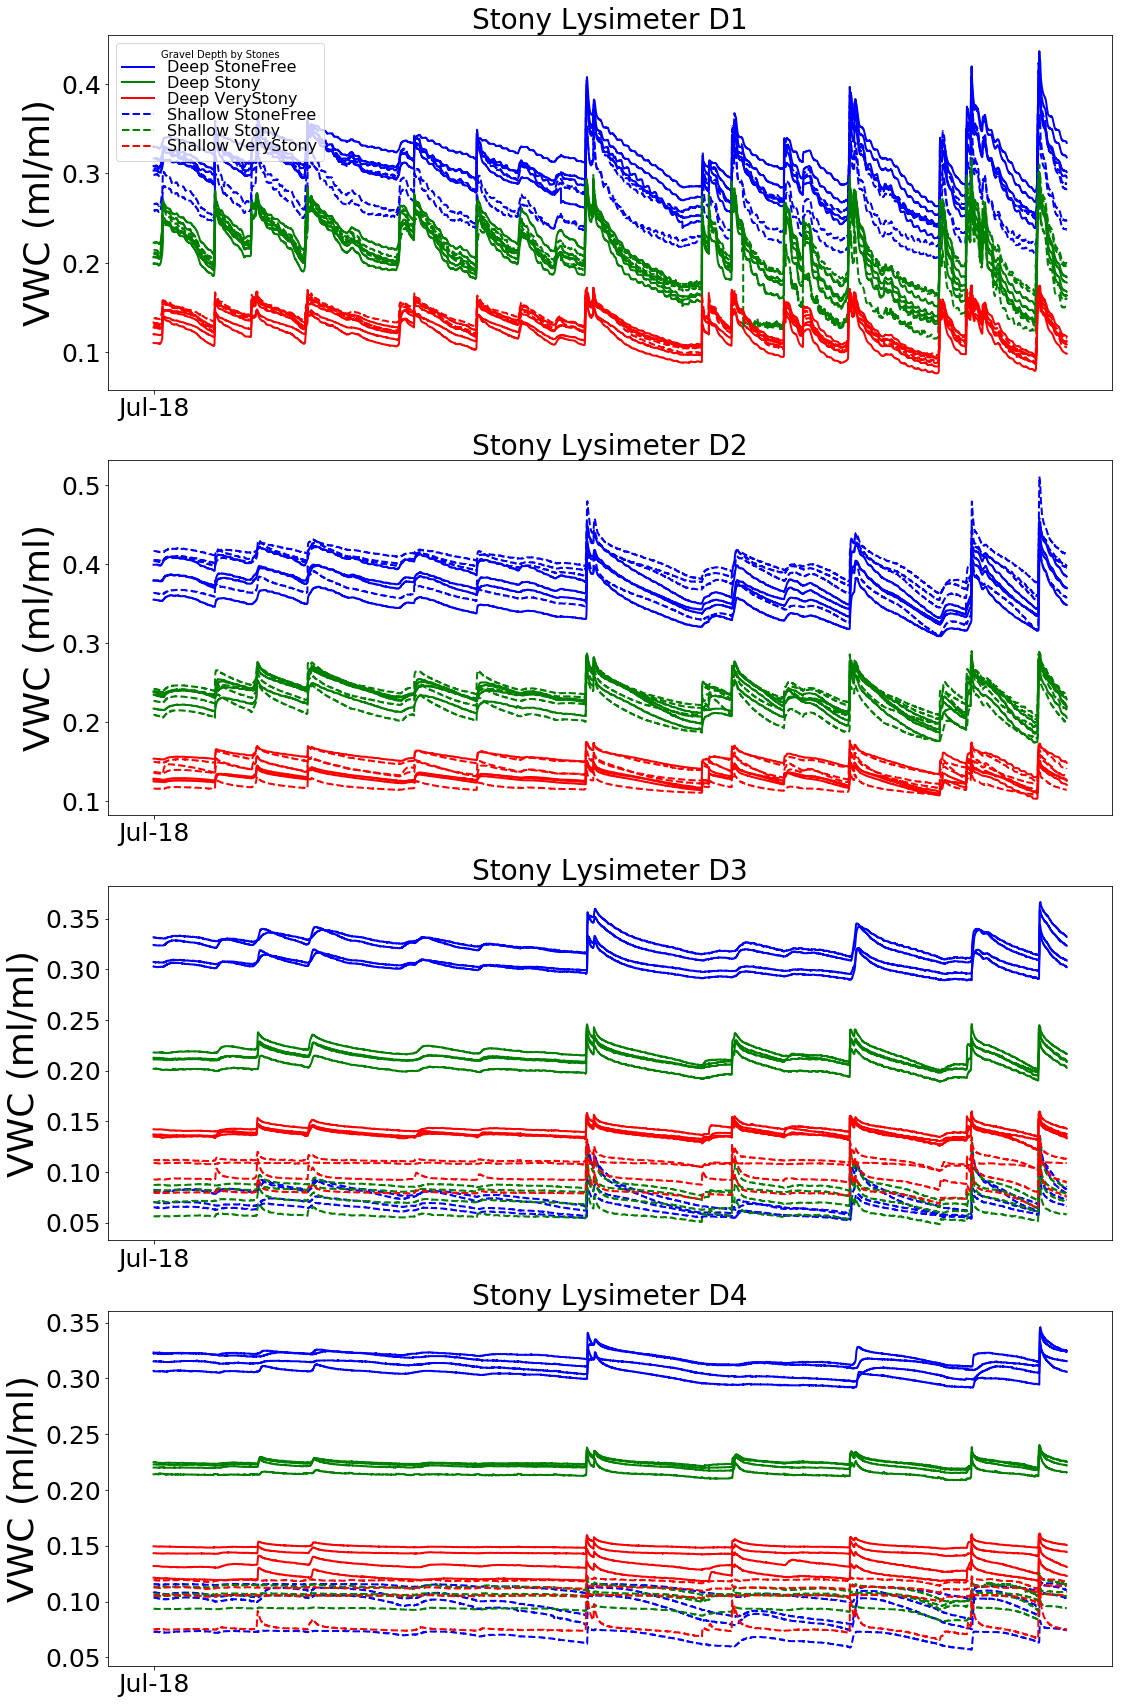

In [191]:
MakeGraph(VWC_calibrated.loc['2018-07-01':,:],'VWC (ml/ml)')

### Calculate offsets and plot

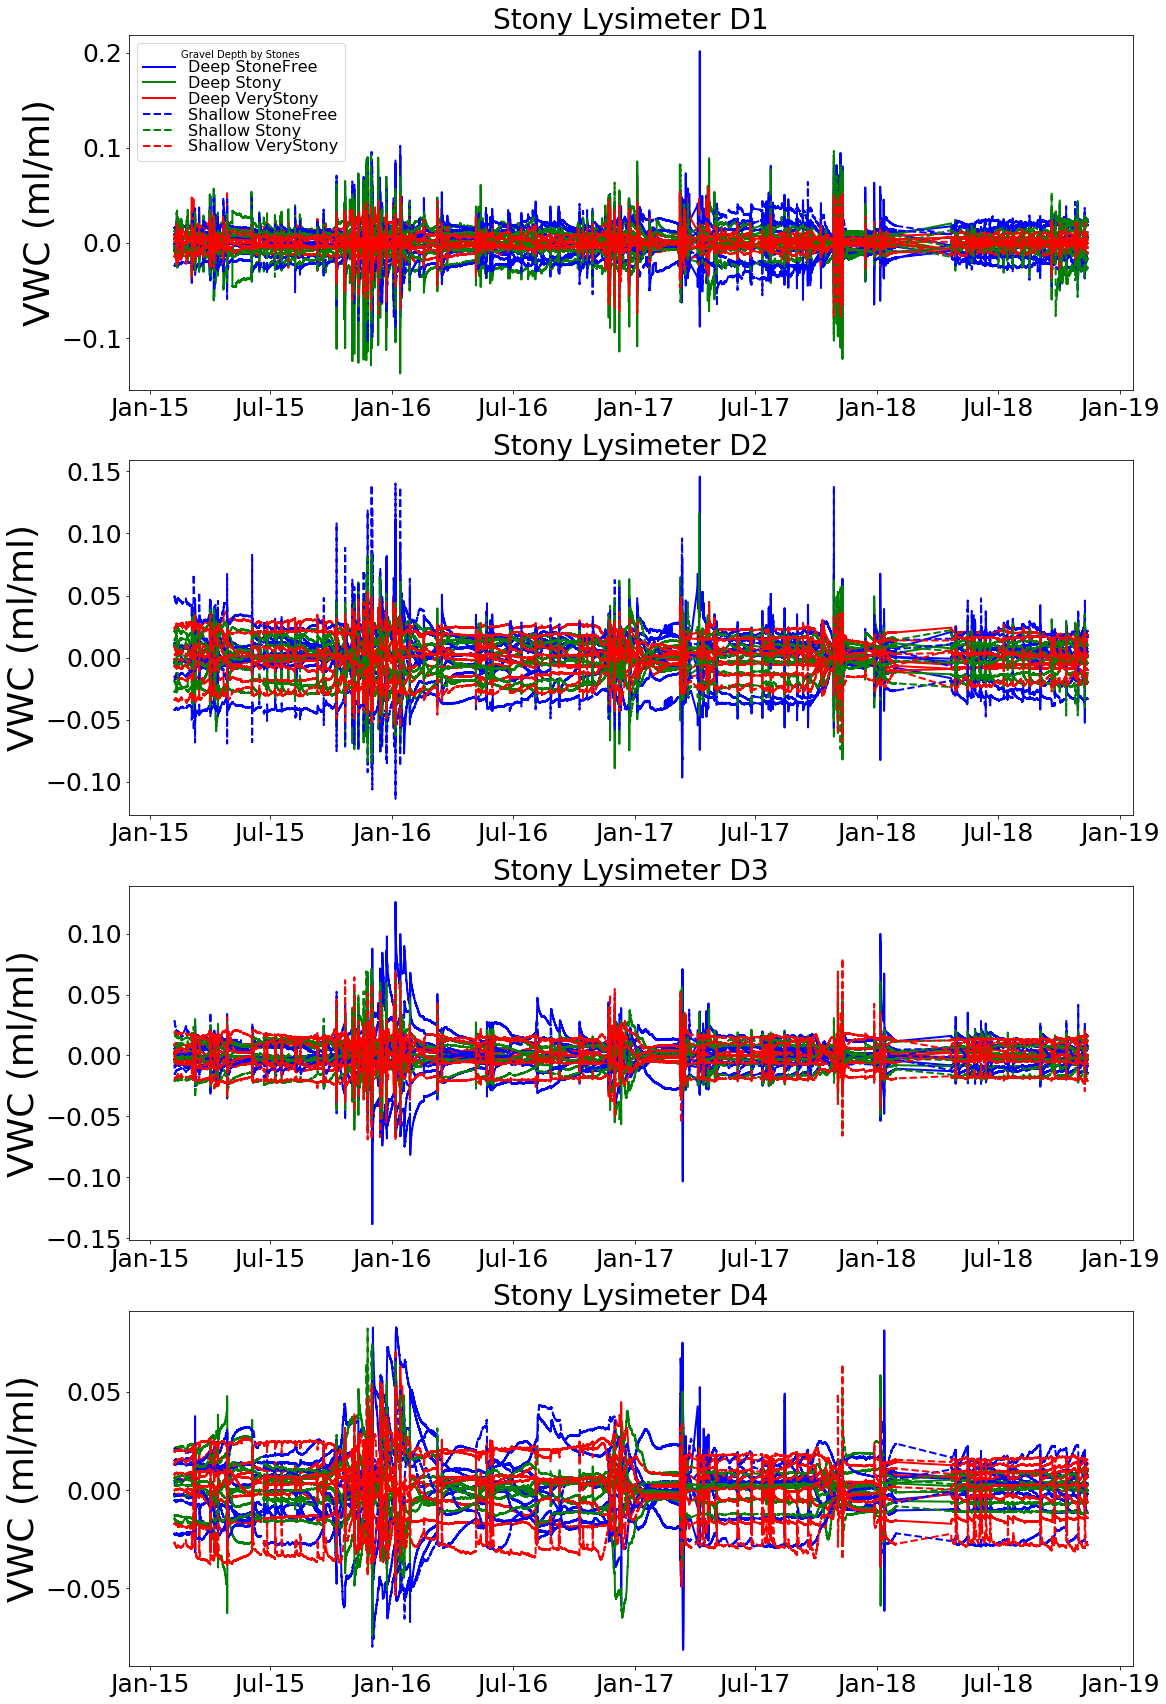

In [190]:
VWCTreatMeans = VWC_calibrated.groupby(level=['Depth','Gravels','Stones'],axis=1).mean()

#Set up empty dataframe with the same index and column structure as the data object
OffSets = pd.DataFrame(index = VWC_calibrated.index, columns = VWC_calibrated.columns)  

#Step through each series (a series is a time series of measurements for a given depth in a given experimental plot) 
#and produces a sub plot of the time series of VWC data
for X in VWC_calibrated: 
    #Set index values for each series of measurements
    Depth = X[0]
    Gravels = X[1]
    Stones = X[2]
    Block = X[9]
    #Create an object containing the time series of mean values for the treatment and depth that the current series belongs to.
    TreatmentMeans = VWCTreatMeans.loc[:,(Depth,Gravels,Stones)]
    #Create an object containing the time series of measurements for the plot and measurement depth currently under consideration 
    SeriesValues = VWC_calibrated.loc[:,X]
    OffSets.loc[:,X] = SeriesValues - TreatmentMeans

MakeGraph(OffSets,'VWC (ml/ml)')

## No large spikes suggesting no outlyers that can be easily cleaned

## Calculate DUL and LL for each layer

In [193]:
Layer_DUL = np.percentile(VWC_calibrated.iloc[:,:].dropna(),97,axis=0)
Layer_LL = np.percentile(VWC_calibrated.iloc[:,:].dropna(),1,axis=0)
Params = pd.DataFrame(columns = VWC_calibrated.columns,index=['DUL','LL'],
                     data = [Layer_DUL,Layer_LL])

## Calculate profile variables

In [194]:
def VWCProfile(Frame):
    first = np.add(Frame.loc[:,'D1'] * 150,Frame.loc[:,'D2'] * 150)
    second = np.add(first,Frame.loc[:,'D3'] * 150)
    third = np.add(second,Frame.loc[:,'D4'] * 150)
    return third
ProfileWater = VWCProfile(VWC_calibrated.loc['2018-07-01':,:].resample('h').mean())
ProfileParams = VWCProfile(Params)

In [195]:
def PAW_pc(DUL,LL):
    return lambda VWC: (VWC-LL)/(DUL-LL)
PAW = ProfileWater.copy()
for tube in PAW:
    DUL = ProfileParams.loc['DUL',tube]
    LL = ProfileParams.loc['LL',tube]
    result = PAW_pc(DUL,LL)
    PAW.loc[:,tube] = [result(PAW.loc[x,tube]) for x in PAW.index ]

Text(0.05,0.85,'Field Capacity')

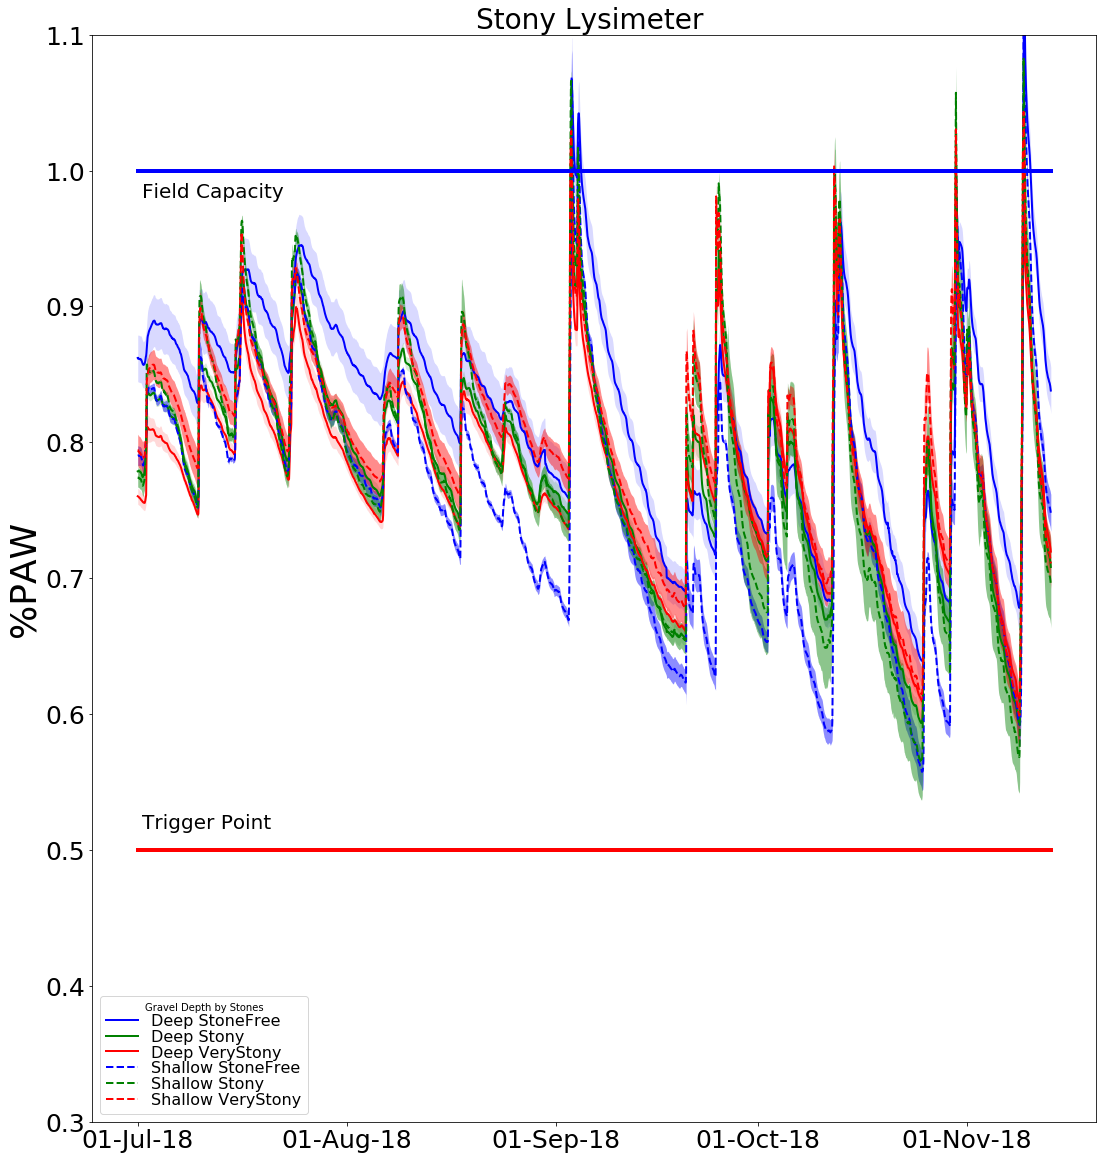

In [220]:
Graph = plt.figure(figsize=(18,20))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlotWithSEM(PAW,ax,GPs, 2)
plt.ylabel('%PAW', fontsize=36);
plt.tick_params(labelsize=25)
plt.title('Stony Lysimeter ', fontsize=28);
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
if pos == 1:
    labels, handles = GH.DedupLegendElements()
    ledg = plt.legend(labels, handles,loc=3,numpoints=1,fontsize = 20,labelspacing = 0.05, 
                          title='Gravel Depth by Stones')
plt.plot([PAW.index.min(),PAW.index.max()],[0.5,0.5],'r-',lw=4)
plt.plot([PAW.index.min(),PAW.index.max()],[1,1],'b-',lw=4)
plt.ylim(0.3,1.1)
plt.text(0.05,0.27,'Trigger Point',transform=ax.transAxes,fontsize=20)
plt.text(0.05,0.85,'Field Capacity',transform=ax.transAxes,fontsize=20)

## Calculate Soil Water Deficits

In [201]:
def Calc_SWD(DUL):
    return lambda VWC: -(DUL- VWC)
SWD = ProfileWater.copy()
for tube in PAW:
    DUL = ProfileParams.loc['DUL',tube]
    result = Calc_SWD(DUL)
    SWD.loc[:,tube] = [result(SWD.loc[x,tube]) for x in PAW.index ]

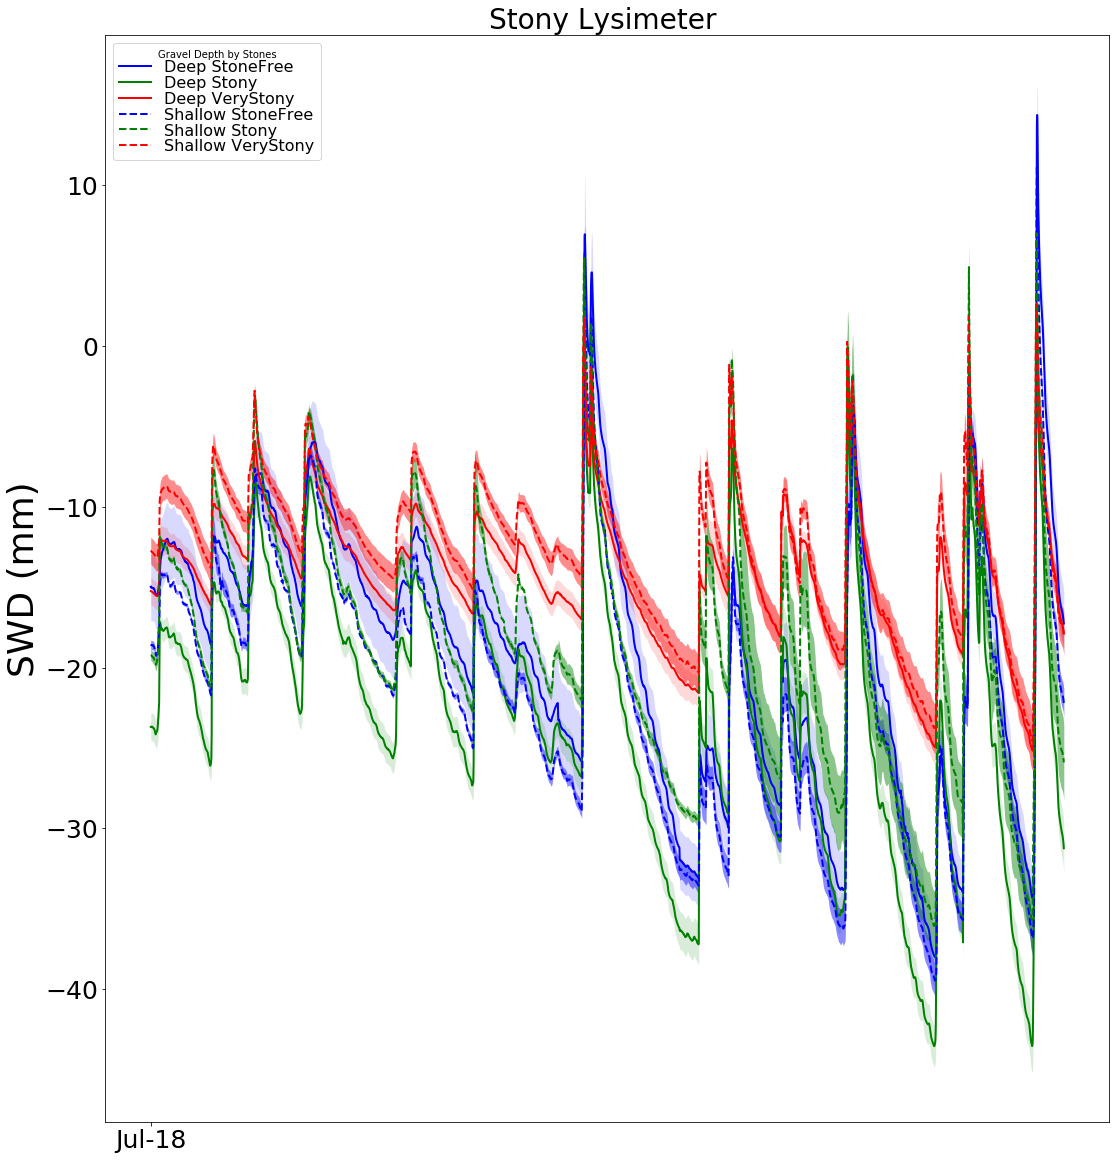

In [203]:
Graph = plt.figure(figsize=(18,20))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlotWithSEM(SWD,ax,GPs, 2)
plt.ylabel('SWD (mm)', fontsize=36);
plt.tick_params(labelsize=25)
plt.title('Stony Lysimeter ', fontsize=28);
ax.xaxis.set_major_locator(mdates.MonthLocator([1,7]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
if pos == 1:
    labels, handles = GH.DedupLegendElements()
    ledg = plt.legend(labels, handles,loc=2,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                          title='Gravel Depth by Stones')

## Export Temperature data frame

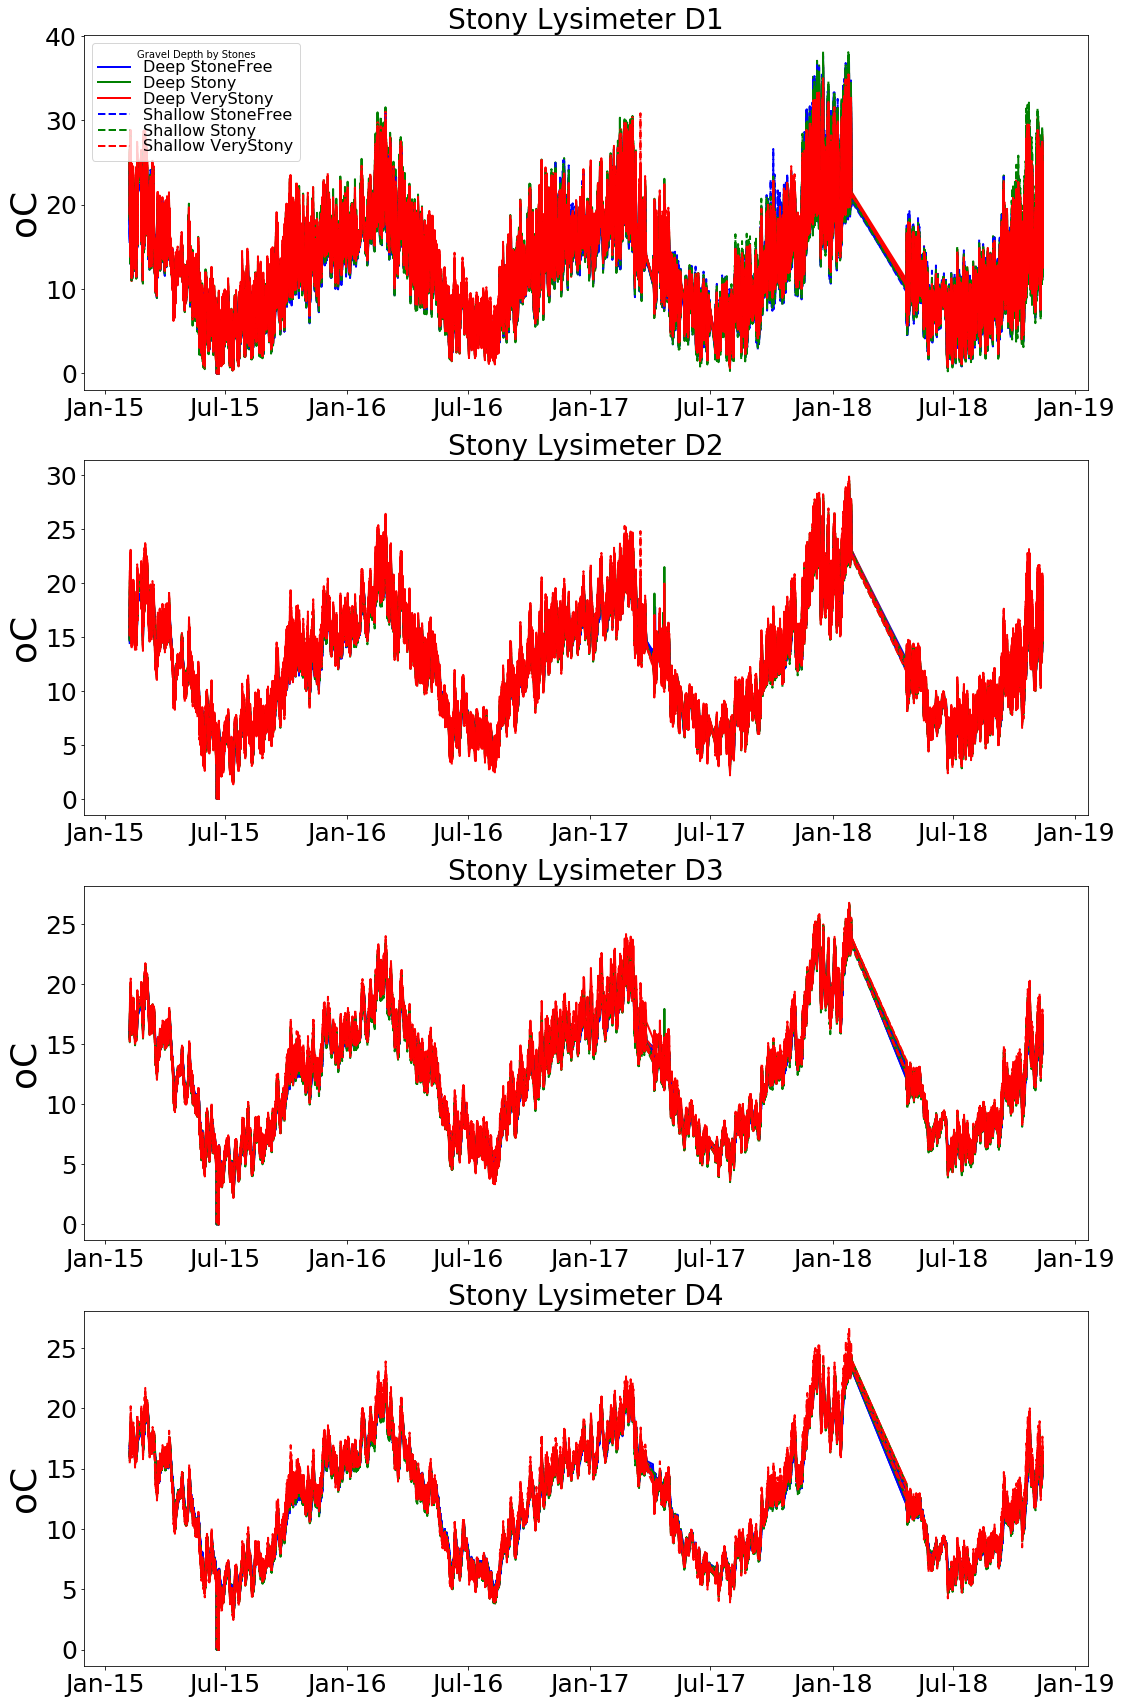

In [192]:
Temp = Data.Temperature

MakeGraph(Temp,'oC')

Temp.to_pickle('.\DataFrames\LysoTemp_df')

## Export Electrical Conductivity Data frame

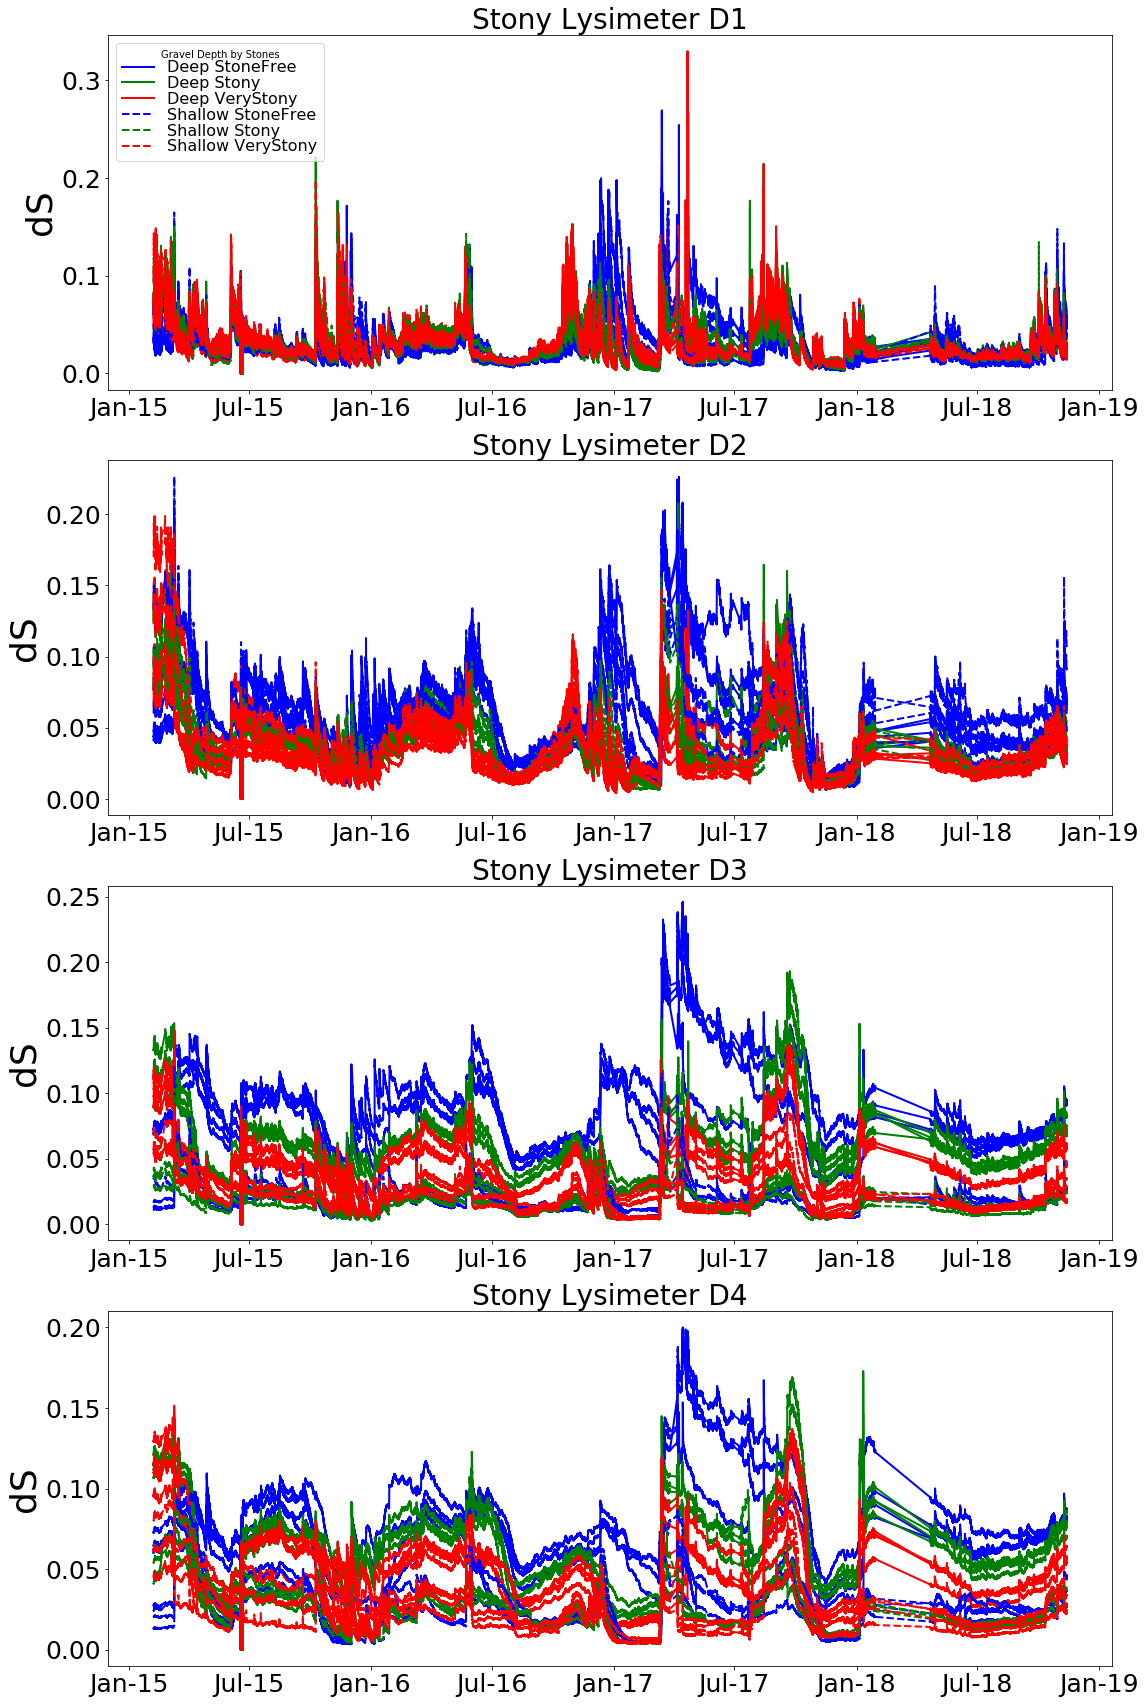

In [153]:
EC = Data.ElectricalConductivity

MakeGraph(EC,'dS')

EC.to_pickle('.\DataFrames\LysoEC_df')